In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def time():
    t1=np.arange(1,40,1)
    t2=np.arange(44,80,1)
    t3=np.arange(84,101,1)
    t=list(t1)+list(t2)+list(t3)
    return t
t1=time()

In [3]:
def process(r):
    x=np.zeros(101)
    x[0]=np.random.normal(0,1,1)
    for i in range(1,101):
        x[i]=0.7*x[i-1]+np.random.normal(0,r,1)
    return x[1:]
len(process(0.5))

100

In [4]:
errors=np.random.normal(0,0.1,100)
x = process(0.5)
y=x+errors

In [5]:
y1 = y
y1 = np.delete(y1,np.array([40,41,42,43,80,81,82,83])-1)

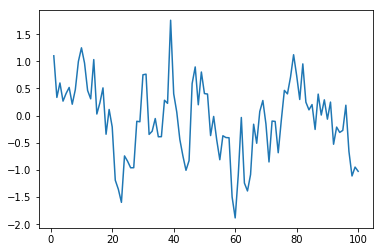

In [6]:
t=np.linspace(1,100,100)
plt.plot(t,x)


In [7]:
# def data(q):
#     y=np.zeros(92)
#     for j in range(0,92):
#         y[j]=x[j]+np.random.normal(0,q)
#     return y
# y1=data(0.1)


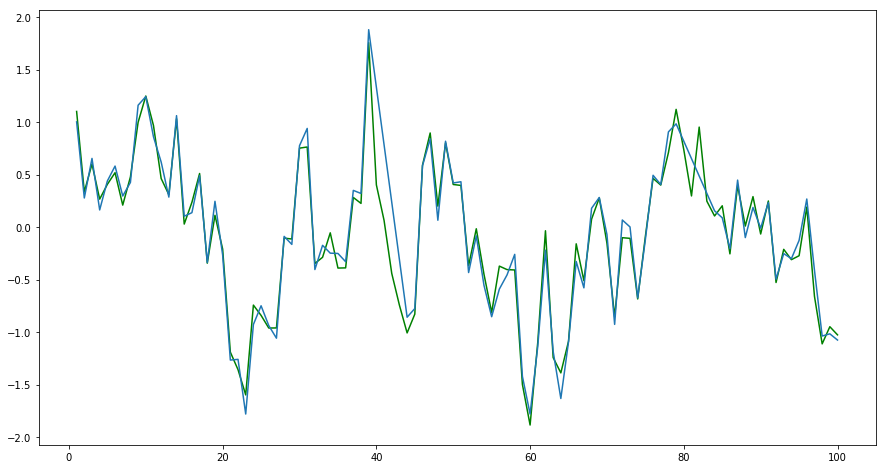

In [8]:
plt.figure(figsize=(15, 8))
plt.plot(t,x,color="green")
plt.plot(t1,y1)

In [9]:
def kalman(alpha, sigma,mu,r,q,mt,T,y):
    mu_new=np.zeros(T)
    sig_new=np.zeros(T)
    kt=np.zeros(T)
    
    mu_old=alpha*mu
    sig_old=q+mt*sigma*mt
    
    I=[40,41,42,43,80,81,82,83]
    
    for i in range(0,T):
        if (i in I)==False:
            h=1
        else:
            h=0
        kt[i]=sig_old*h*(h*sig_old*h+r)**(-1)
        mu_new[i]=mu_old+kt[i]*(y[i]-h*mu_old)
        sig_new[i]=(1-kt[i]*h)*sig_old
        mu_old=alpha*mu_new[i]
        sig_old=q+mt*sig_new[i]*mt
    return mu_new,sig_new
kal=kalman(0.7,1,0,0.1,0.5,1,100,y)      
        

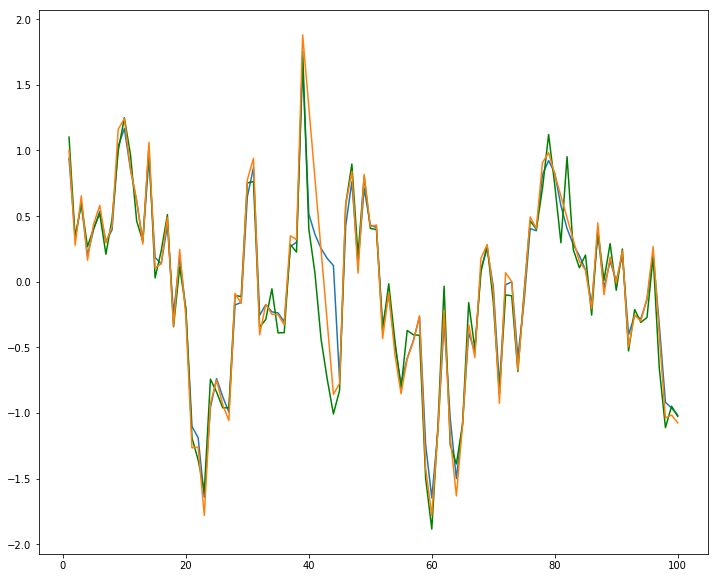

In [10]:
plt.figure(figsize=(12,10))
plt.plot(t,kal[0])
plt.plot(t,x,color="green")
plt.plot(t1,y1)

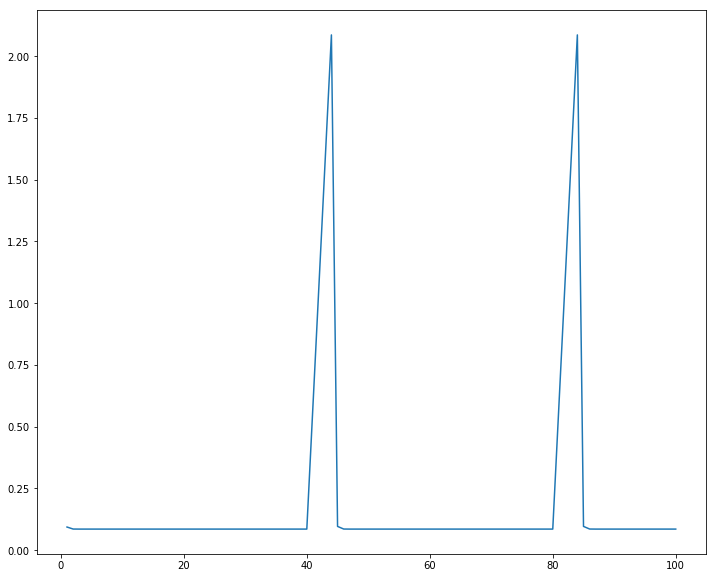

In [11]:
plt.figure(figsize=(12, 10))
plt.plot(t,kal[1])